<a href="https://colab.research.google.com/github/MariaPetrovskaya/SpiroCNN_Gramian-Angular-Field/blob/main/test_demo__SpiroCNN_Gramian_Angular_Field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision.datasets
import random
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

from PIL import Image


In [3]:
from skimage.feature import hog

In [4]:
import json

In [5]:
import inspect

In [6]:
import os
import zipfile


In [7]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score

In [8]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


**Результат** Загрузка всех библиотек

# Исследовательский анализ данных

##Загрузка датасета

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/medic/manual_markdown.csv')
display(data.info())
display (data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    2182 non-null   int64  
 1   Unnamed: 0      2182 non-null   int64  
 2   VisitDate       2182 non-null   object 
 3   FullName        2182 non-null   object 
 4   Id              2182 non-null   object 
 5   Sex             2182 non-null   object 
 6   Age             2182 non-null   int64  
 7   Height          2182 non-null   object 
 8   Weight          2182 non-null   float64
 9   Race            2182 non-null   object 
 10  order           2182 non-null   int64  
 11  group           2139 non-null   object 
 12  time            2182 non-null   object 
 13  ats             695 non-null    object 
 14  fvc             2182 non-null   float64
 15  fev1            2182 non-null   float64
 16  fev1_fv         2182 non-null   float64
 17  fef             2182 non-null   f

None

,Unnamed: 0.1,Unnamed: 0,VisitDate,FullName,Id,Sex,Age,Height,Weight,Race,...,fv_chart,vt_chart,EffortTime,EffortSelected,ATS_DB,test_set,image_path,ToDo,M_Acceptable,M_Invalid
0,0,0,2012-04-24 11:20:39,"ALANOCA, LIDIA",28329842,Female,30,147.00,71.3,Caucasian,...,"[[-3.219153822168399e-05, 0.03936595904002329,...","[[-0.9381736442078437, -0.024451115267061018, ...",2012-04-24 11:25:43,0,NaN,True,markdown_0000000.png,False,Acceptable,NaN
1,1,1,2010-08-31 10:51:15,"AQUINO, Maria",14341949,Female,48,149.00,60.0,Caucasian,...,"[[-1.568911993898875e-05, 0.020543781908681554...","[[-0.21212526382310964, -0.05711242343546713, ...",2010-08-31 10:53:35,1,NaN,False,markdown_0000001.png,False,Acceptable,NaN
2,2,2,2010-08-31 10:51:15,"AQUINO, Maria",14341949,Female,48,149.00,60.0,Caucasian,...,"[[-1.568911993898875e-05, 0.020543781908681554...","[[-0.5302579200894569, -0.0897270503630418, -0...",2010-08-31 10:55:03,1,NaN,False,markdown_0000002.png,False,Acceptable,NaN
3,3,3,2010-08-31 16:09:06,"AYERBIDE, Lidia",10466214,Female,65,147.00,53.0,Caucasian,...,"[[-1.0275278126090677e-06, 0.03769314525920930...","[[-0.31001582584666504, -0.15500298545902255, ...",2010-08-31 16:11:42,0,1.0,False,markdown_0000003.png,False,Numeric,NaN
4,4,4,2010-08-31 16:09:06,"AYERBIDE, Lidia",10466214,Female,65,147.00,53.0,Caucasian,...,"[[-1.0275278126090677e-06, 0.01884623012033378...","[[-0.49764329316188227, -0.15500298545902255, ...",2010-08-31 16:15:22,0,1.0,False,markdown_0000004.png,False,Numeric,NaN


In [10]:
def dataset_info(dataset):
    count = 0
    for column in dataset.columns:
        count += 1
        print('Название столбца:     ',column)                          #покажет как называется столбец
        print('Длина столбца:        ',len(dataset[column]))            #отобразит длину столбца
        print('Количество пропусков: ',dataset[column].isna().sum())    #отобразит количество пропусков
        print('Тип данных в столбце: ',dataset[column].dtype)           #покажет тип данных в столбце
        print('Пример значений:      ')
        print(dataset[column].unique())                                 #отобразит уникальные значения
        print('Количество уникальных значений: ',dataset[column].nunique())  #отобразит количество уникальных значений
        print('----------------')
    print('Всего столбцов в датасете:', count)                          #подсчитает количество столбцов в датасете
    print('Количество дубликатов: ',dataset.duplicated().sum())         #подсчитает количество полных строк-дубликатов

In [11]:
# #передадим для анализа наш датасет
# dataset_info(data)

Ключевые признаки для спирограмм:

PEF (Peak Expiratory Flow)

FEV1 (Forced Expiratory Volume in 1 second)

FVC (Forced Vital Capacity)

Соотношение FEV1/FVC (индекс Тиффно)

MEF25-75 (средний поток на 25-75% выдоха)

**Заметки**Модель работала с двумя стандартными графиками спирометрии:

Кривая "объём–время" (Volume-Time)

Ось X: время (секунды).

Ось Y: объём выдохнутого воздуха (литры).

Ключевые точки: начало выдоха, плато (признак завершённости маневра).

Кривая "поток–объём" (Flow-Volume Loop)

Ось X: объём (литры).

Ось Y: скорость потока воздуха (л/сек).

Ключевые признаки: пик потока (PEF), форма петли (например, "зазубренность" при обструкции).


**Дальнейший план** - добавить релевантные числовые данные из датасета в алгоритм фичи модели проверить как это повлияет на метрики

## Предобработка данных

In [12]:
# Список значений, которые нужно исключить
values_to_remove = ['Numeric', 'Questionable', 'Invalid']

# Фильтруем датасет, оставляя только строки, где M_Acceptable НЕ входит в values_to_remove
filtered = data[~data['M_Acceptable'].isin(values_to_remove)]

# Проверяем результат
print(filtered['M_Acceptable'].value_counts())

M_Acceptable
Acceptable        813
Non-acceptable    292
Name: count, dtype: int64


In [13]:
# Список значений, которые нужно исключить
values_to_remove = [False]

# Фильтруем датасет
filtered_df = filtered[~filtered['test_set'].isin(values_to_remove)]

# Проверяем результат
print ("валидационная выборка")
print(filtered_df['M_Acceptable'].value_counts())

валидационная выборка
M_Acceptable
Acceptable        210
Non-acceptable     74
Name: count, dtype: int64


In [14]:
# Список значений, которые нужно исключить
values_to_remove = [True]

# Фильтруем датасет
training_df = filtered[~filtered['test_set'].isin(values_to_remove)]

# Проверяем результат
print ("обучающая выборка")
print(training_df['M_Acceptable'].value_counts())

обучающая выборка
M_Acceptable
Acceptable        603
Non-acceptable    218
Name: count, dtype: int64


In [15]:
#Сводная информация об данных
print ("обучающая выборка")
print(training_df['M_Acceptable'].value_counts())
print ("валидационная выборка")
print(filtered_df['M_Acceptable'].value_counts())

обучающая выборка
M_Acceptable
Acceptable        603
Non-acceptable    218
Name: count, dtype: int64
валидационная выборка
M_Acceptable
Acceptable        210
Non-acceptable     74
Name: count, dtype: int64


#Работающий baseline

In [16]:
newdata=training_df.copy()

In [17]:
valid_data=filtered_df.copy()

## Преобразование графиков Gramian Angular Field (GAF)



### Метод HOG (в сравнении с другими лучшая метрика)

Гистограмма ориентированных градиентов (HOG)
Histogram of Oriented Gradients (HOG) — это метод описания изображений, который кодирует информацию о локальных градиентах яркости. Он особенно эффективен для задач, где важны форма и структура объектов (например, медицинские снимки, детекция патологий).

**Основные шаги вычисления HOG:**
Нормализация изображения (гамма-коррекция для уменьшения влияния освещения).

Вычисление градиентов (нахождение направления и величины изменения яркости).

Разбиение на ячейки (cells) и построение гистограмм градиентов в каждой.

Нормализация блоков (blocks) для устойчивости к изменениям освещения.

Объединение в финальный дескриптор (вектор признаков).

In [20]:
# from skimage.feature import hog

def hog_features(self, image):
    """Извлечение HOG-признаков"""
    hog_feats = hog(image.numpy(), pixels_per_cell=(16, 16), cells_per_block=(1, 1))
    return torch.tensor(hog_feats)


In [21]:
class MedicalDataset(Dataset):
    def __init__(self, dataframe, transform=None, convert_to_ts=False):
        self.dataframe = dataframe
        self.transform = transform
        self.convert_to_ts = convert_to_ts  # Флаг для преобразования в временной ряд

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['full_image_path']
        image = Image.open(img_path).convert('RGB')
        label = self.dataframe.iloc[idx]['M_Acceptable']

        if self.transform:
            image = self.transform(image)

        if self.convert_to_ts:
            # Преобразование изображения в временной ряд
            image = self.image_to_time_series(image)

        return image, torch.tensor(label, dtype=torch.long)

    def image_to_time_series(self, image_tensor):
        """
        Преобразует изображение (тензор) в временной ряд
        """
        # 1. Преобразование в grayscale (если нужно)
        if image_tensor.shape[0] == 3:  # RGB изображение
            gray_image = 0.2989 * image_tensor[0] + 0.5870 * image_tensor[1] + 0.1140 * image_tensor[2]
        else:
            gray_image = image_tensor.squeeze()

        # 2. Развертывание изображения в 1D ряд (разные стратегии, сравнивались)
        # Вариант 1: среднее по строкам/столбцам
        # time_series = gray_image.mean(dim=1)  # среднее по столбцам (получаем ряд длины 224)

        # Вариант 2: обход по спирали
        # time_series = self.spiral_scan(gray_image)

        # Вариант 3
        #time_series = self.column_wise_flatten(gray_image)

        # Вариант 4
        #time_series = self.row_wise_flatten(gray_image)

        # Вариант 5
        time_series = self.hog_features(gray_image)
        # Нормализация
        time_series = (time_series - time_series.mean()) / (time_series.std() + 1e-8)

        return time_series

    def spiral_scan(self, image):
        """Альтернативный метод: обход изображения по спирали"""
        # Реализация спирального обхода...
        pass

In [22]:

images_dir = '/content/drive/MyDrive/Colab Notebooks/medic/images'

In [23]:

image_dir = '/content/drive/MyDrive/Colab Notebooks/medic/images'

In [24]:
# Загружаем данные
df = newdata.copy() #pd.read_csv(data_path)
df['full_image_path'] = images_dir + df['image_path']

# Преобразуем метки в числовой формат
label_mapping = {label: idx for idx, label in enumerate(df['M_Acceptable'].unique())}
df['label'] = df['M_Acceptable'].map(label_mapping)

In [25]:
# 1. Загрузка данных и подготовка DataFrame
data_path = '/content/drive/MyDrive/Colab Notebooks/medic/manual_markdown.csv'
images_dir = '/content/drive/MyDrive/Colab Notebooks/medic/images/'

# Загружаем данные
df = newdata.copy() #pd.read_csv(data_path)
df['full_image_path'] = images_dir + df['image_path']

# Преобразуем метки в числовой формат
label_mapping = {label: idx for idx, label in enumerate(df['M_Acceptable'].unique())}
df['label'] = df['M_Acceptable'].map(label_mapping)

# 2. Разделение на train и test
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['label']  # Стратифицированное разделение по меткам
)

# 3. Определение трансформаций
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 4. Определение класса Dataset (исправленная версия)
class MedicalDataset(Dataset):
    def __init__(self, dataframe, transform=None, convert_to_ts=False):
        self.dataframe = dataframe
        self.transform = transform
        self.convert_to_ts = convert_to_ts

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['full_image_path']
        image = Image.open(img_path).convert('RGB')
        label = self.dataframe.iloc[idx]['label']

        if self.transform:
            image = self.transform(image)

        if self.convert_to_ts:
            # Преобразование изображения в временной ряд
            image = self._image_to_time_series(image)

        return image, torch.tensor(label, dtype=torch.long)

    def _image_to_time_series(self, image_tensor):
        """Преобразует тензор изображения в временной ряд"""
        if image_tensor.shape[0] == 3:  # RGB изображение
            gray_image = 0.2989 * image_tensor[0] + 0.5870 * image_tensor[1] + 0.1140 * image_tensor[2]
        else:
            gray_image = image_tensor.squeeze()

        # Среднее по столбцам для получения временного ряда
        time_series = gray_image.mean(dim=1)
        time_series = (time_series - time_series.mean()) / (time_series.std() + 1e-8)

        return time_series

# 5. Создание датасетов (теперь переменные определены)
train_dataset = MedicalDataset(train_df, transform=train_transform, convert_to_ts=True)
test_dataset = MedicalDataset(test_df, transform=test_transform, convert_to_ts=True)

# 6. Создание DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Проверка
print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
sample, label = train_dataset[0]
print(f"Sample shape: {sample.shape}, Label: {label}")

Train dataset size: 656
Test dataset size: 165
Sample shape: torch.Size([224]), Label: 0


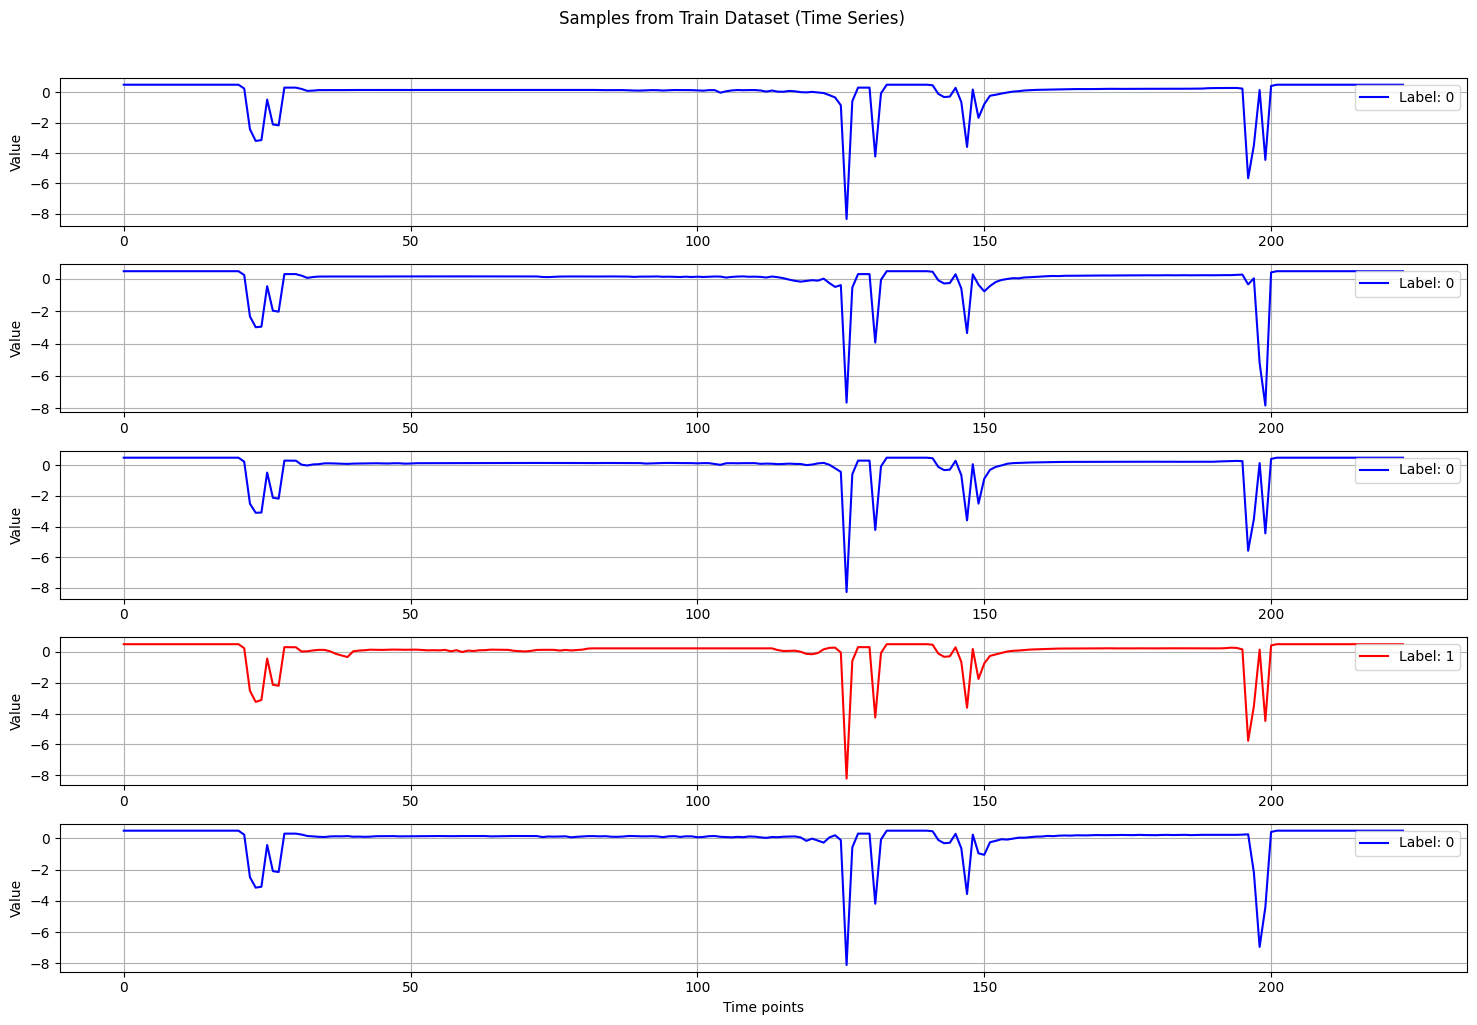

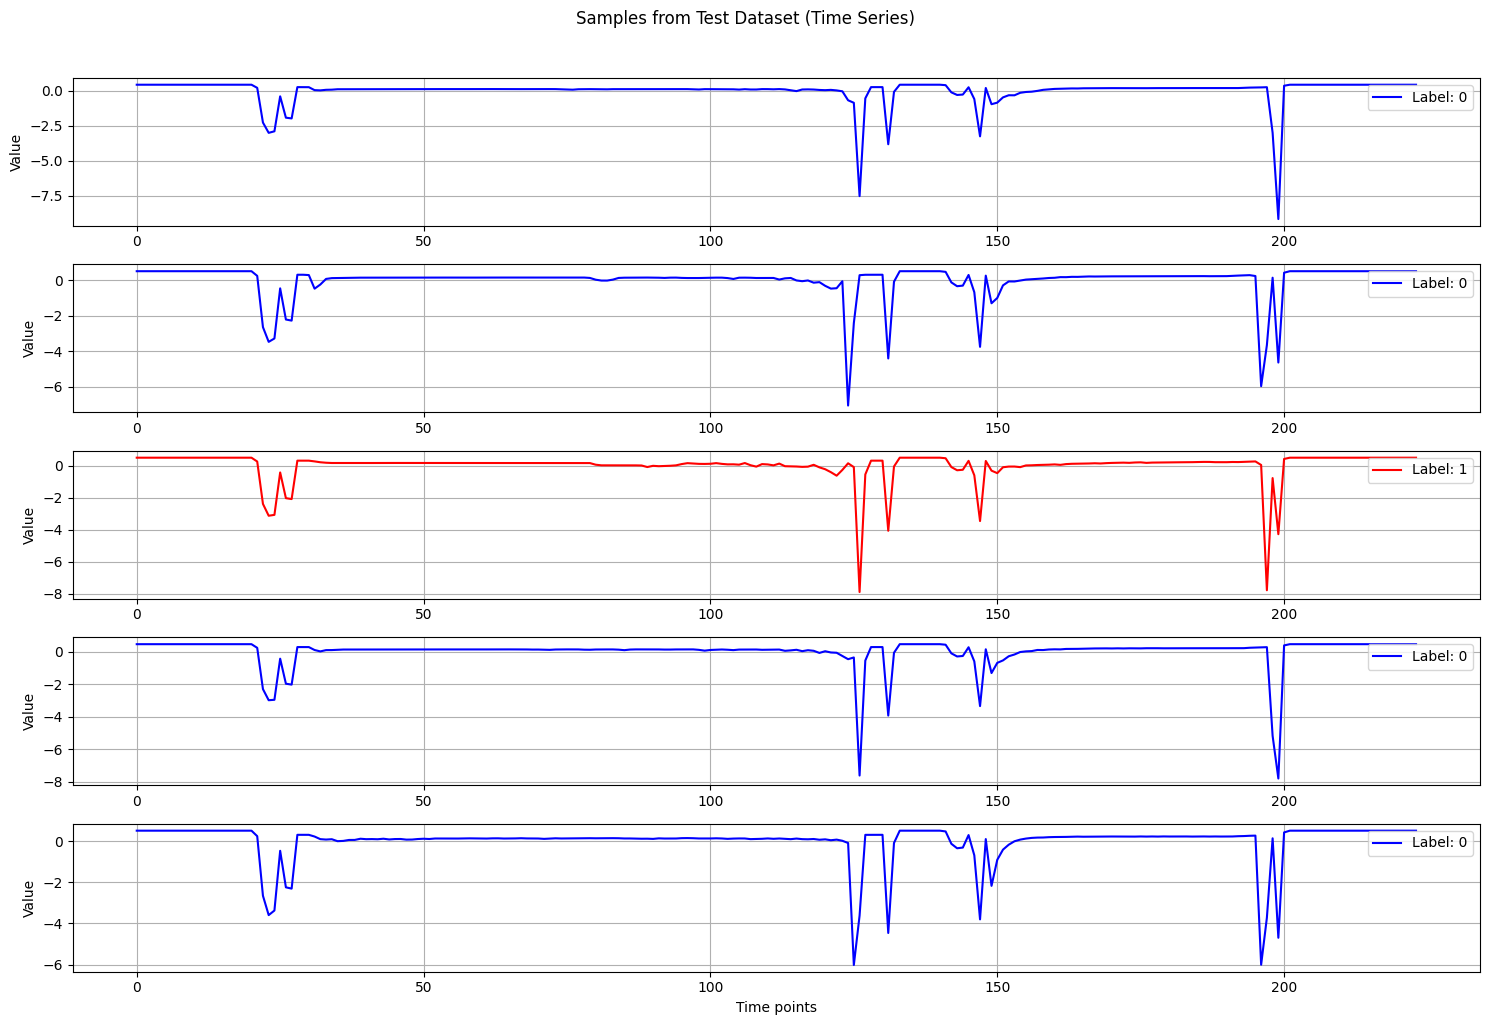

In [26]:

def plot_time_series_samples(dataset, num_samples=5):
    """Визуализация нескольких временных рядов с метками"""
    plt.figure(figsize=(15, 10))

    # Выбираем случайные индексы для визуализации
    indices = np.random.choice(len(dataset), num_samples, replace=False)

    for i, idx in enumerate(indices):
        time_series, label = dataset[idx]
        plt.subplot(num_samples, 1, i+1)
        plt.plot(time_series.numpy(), label=f'Label: {label}',
                color='blue' if label == 0 else 'red')
        plt.legend()
        plt.grid(True)
        plt.ylabel('Value')

    plt.xlabel('Time points')
    plt.suptitle(f'Samples from {"Train" if dataset==train_dataset else "Test"} Dataset (Time Series)', y=1.02)
    plt.tight_layout()
    plt.show()

# Визуализируем примеры из train и test датасетов
plot_time_series_samples(train_dataset)
plot_time_series_samples(test_dataset)

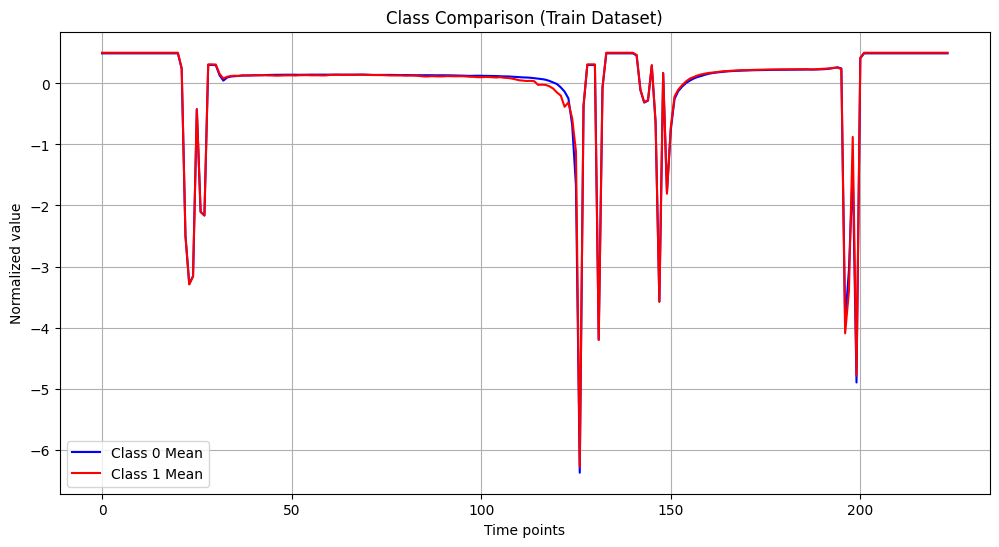

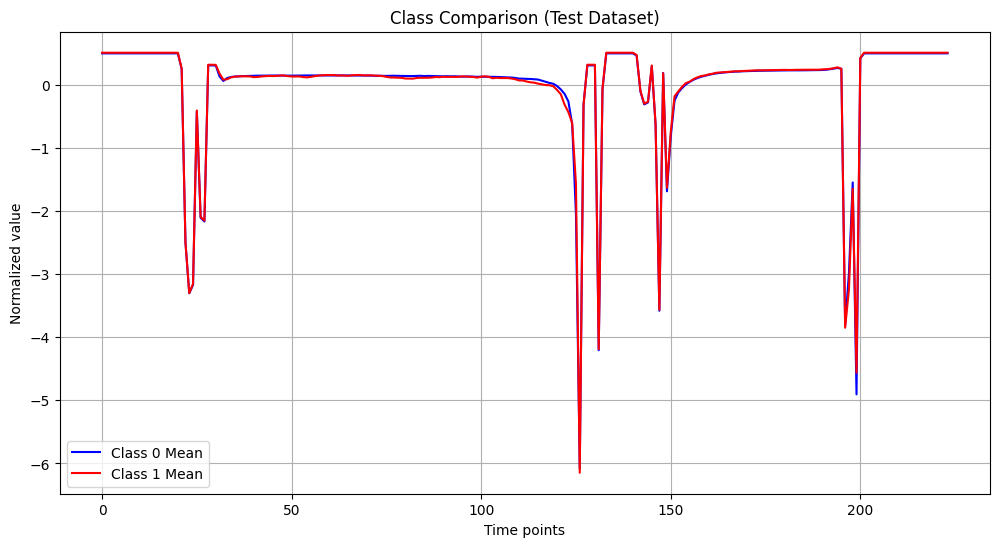

In [27]:
def plot_class_comparison(dataset, title):
    """Сравнение средних временных рядов для разных классов"""
    # Собираем все ряды и метки
    all_series = []
    all_labels = []
    for i in range(len(dataset)):
        series, label = dataset[i]
        all_series.append(series.numpy())
        all_labels.append(label.item())

    # Разделяем по классам
    class0 = [s for s, l in zip(all_series, all_labels) if l == 0]
    class1 = [s for s, l in zip(all_series, all_labels) if l == 1]

    plt.figure(figsize=(12, 6))
    plt.plot(np.mean(class0, axis=0), label='Class 0 Mean', color='blue')
    plt.plot(np.mean(class1, axis=0), label='Class 1 Mean', color='red')

    plt.title(f'Class Comparison ({title})')
    plt.xlabel('Time points')
    plt.ylabel('Normalized value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_class_comparison(train_dataset, 'Train Dataset')
plot_class_comparison(test_dataset, 'Test Dataset')

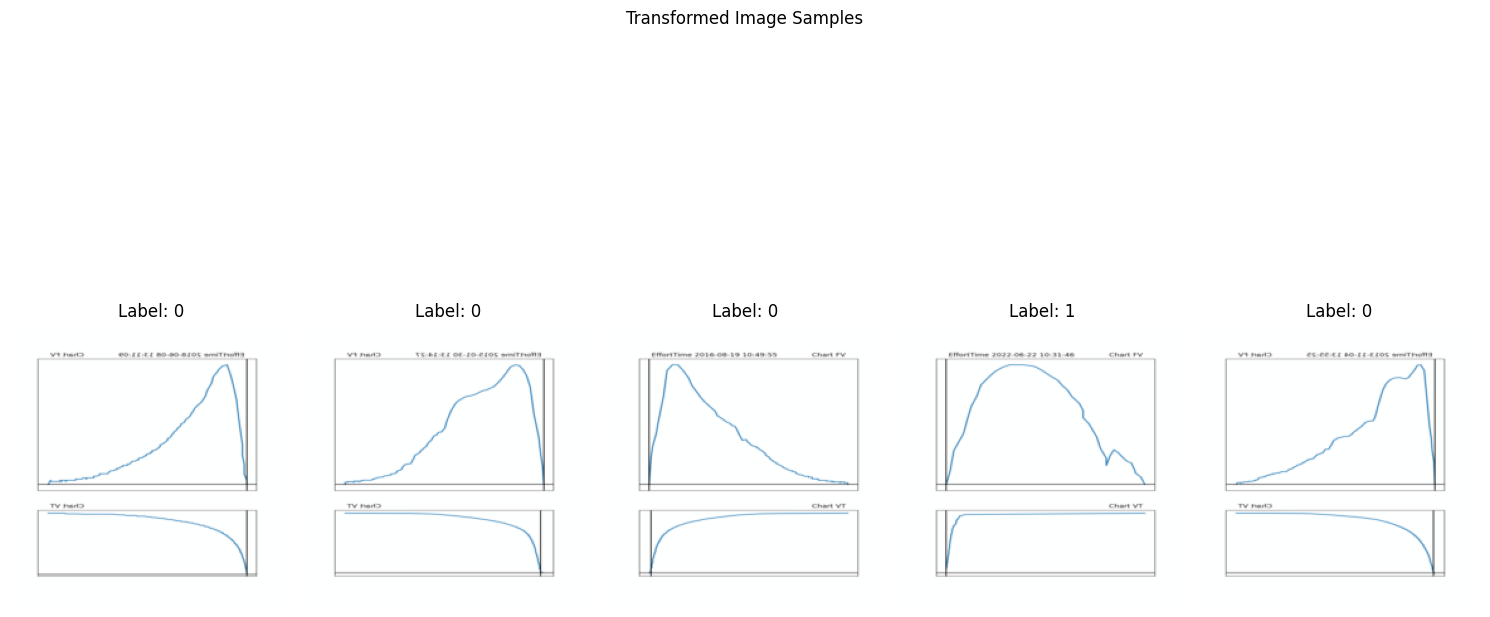

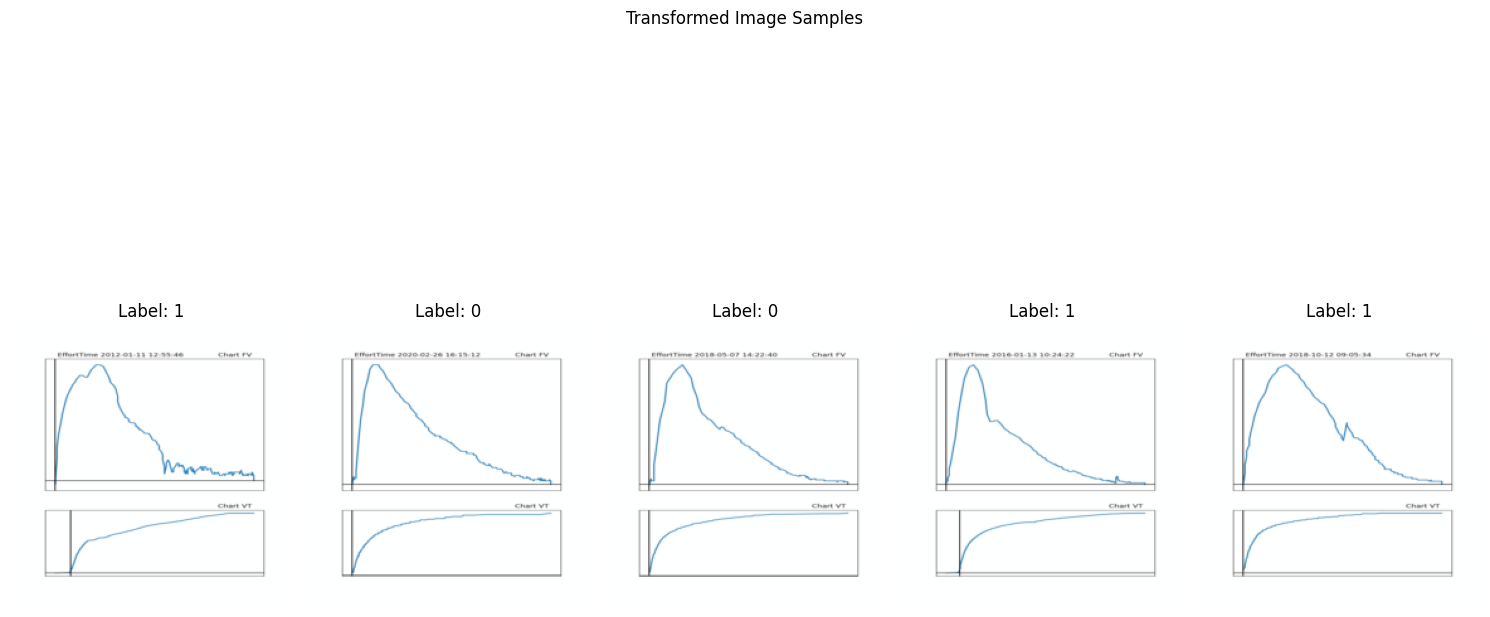

In [28]:
def plot_transformed_images(dataset, num_samples=5):
    """Визуализация изображений после трансформаций (до преобразования в временные ряды)"""
    # Создаем временный датасет без преобразования в временные ряды
    temp_dataset = MedicalDataset(
        dataset.dataframe,
        transform=dataset.transform,
        convert_to_ts=False
    )

    plt.figure(figsize=(15, 8))
    indices = np.random.choice(len(temp_dataset), num_samples, replace=False)

    for i, idx in enumerate(indices):
        image_tensor, label = temp_dataset[idx]

        # Конвертируем тензор обратно в изображение для отображения
        image = image_tensor.numpy().transpose((1, 2, 0))
        image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # обратная нормализация
        image = np.clip(image, 0, 1)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.title(f'Label: {label}')
        plt.axis('off')

    plt.suptitle('Transformed Image Samples', y=1.05)
    plt.tight_layout()
    plt.show()

plot_transformed_images(train_dataset)
plot_transformed_images(test_dataset)

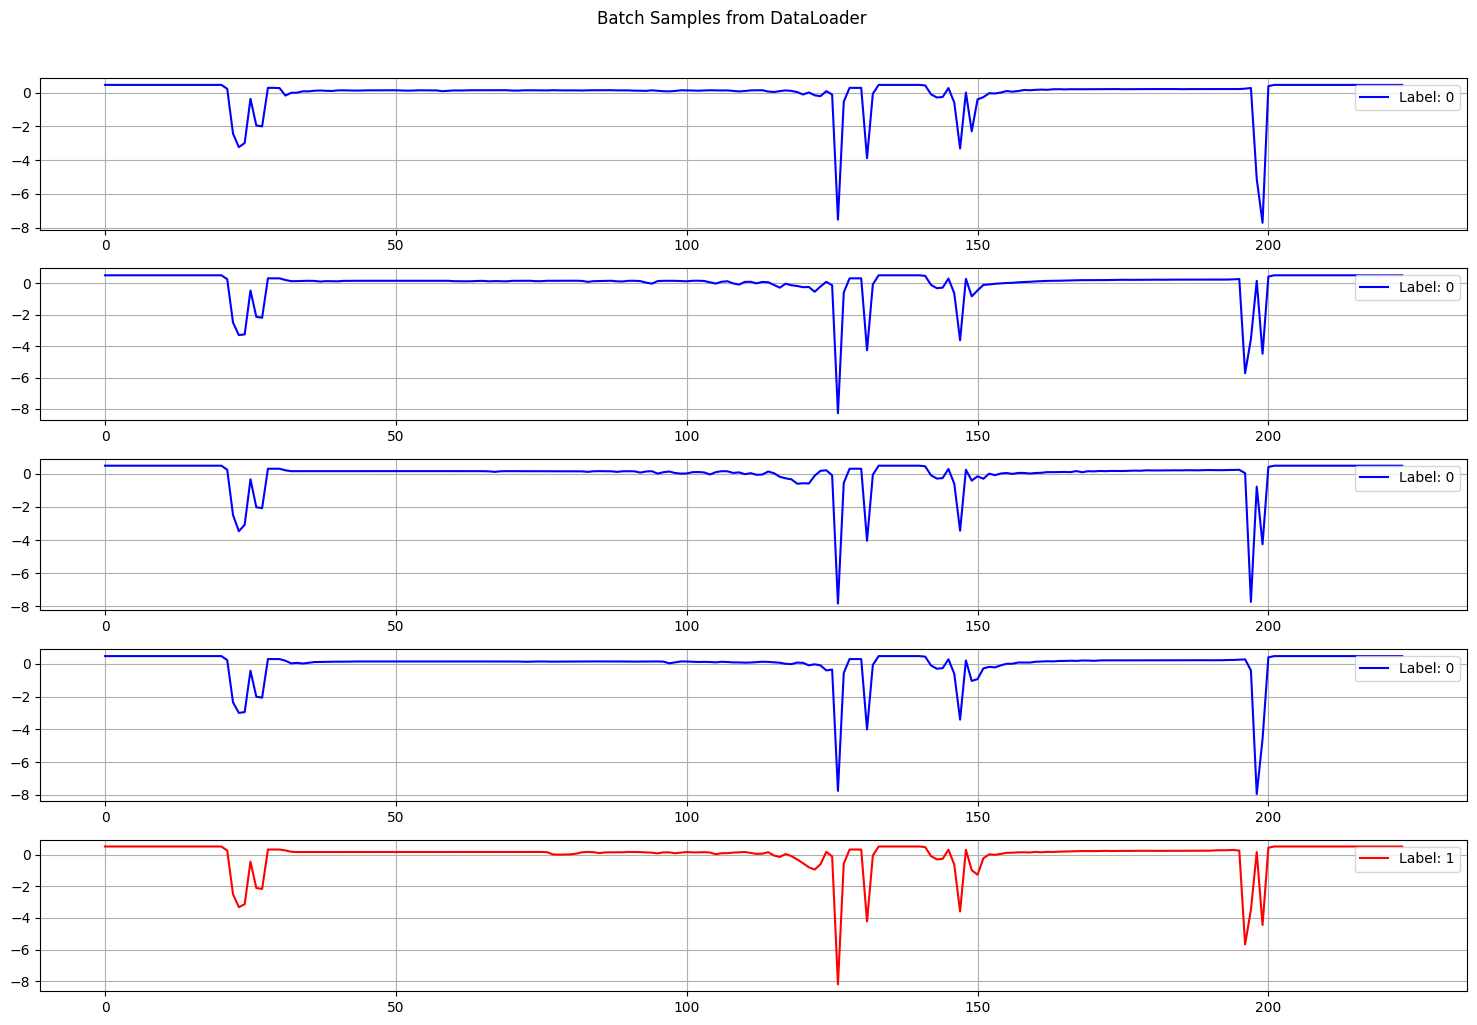

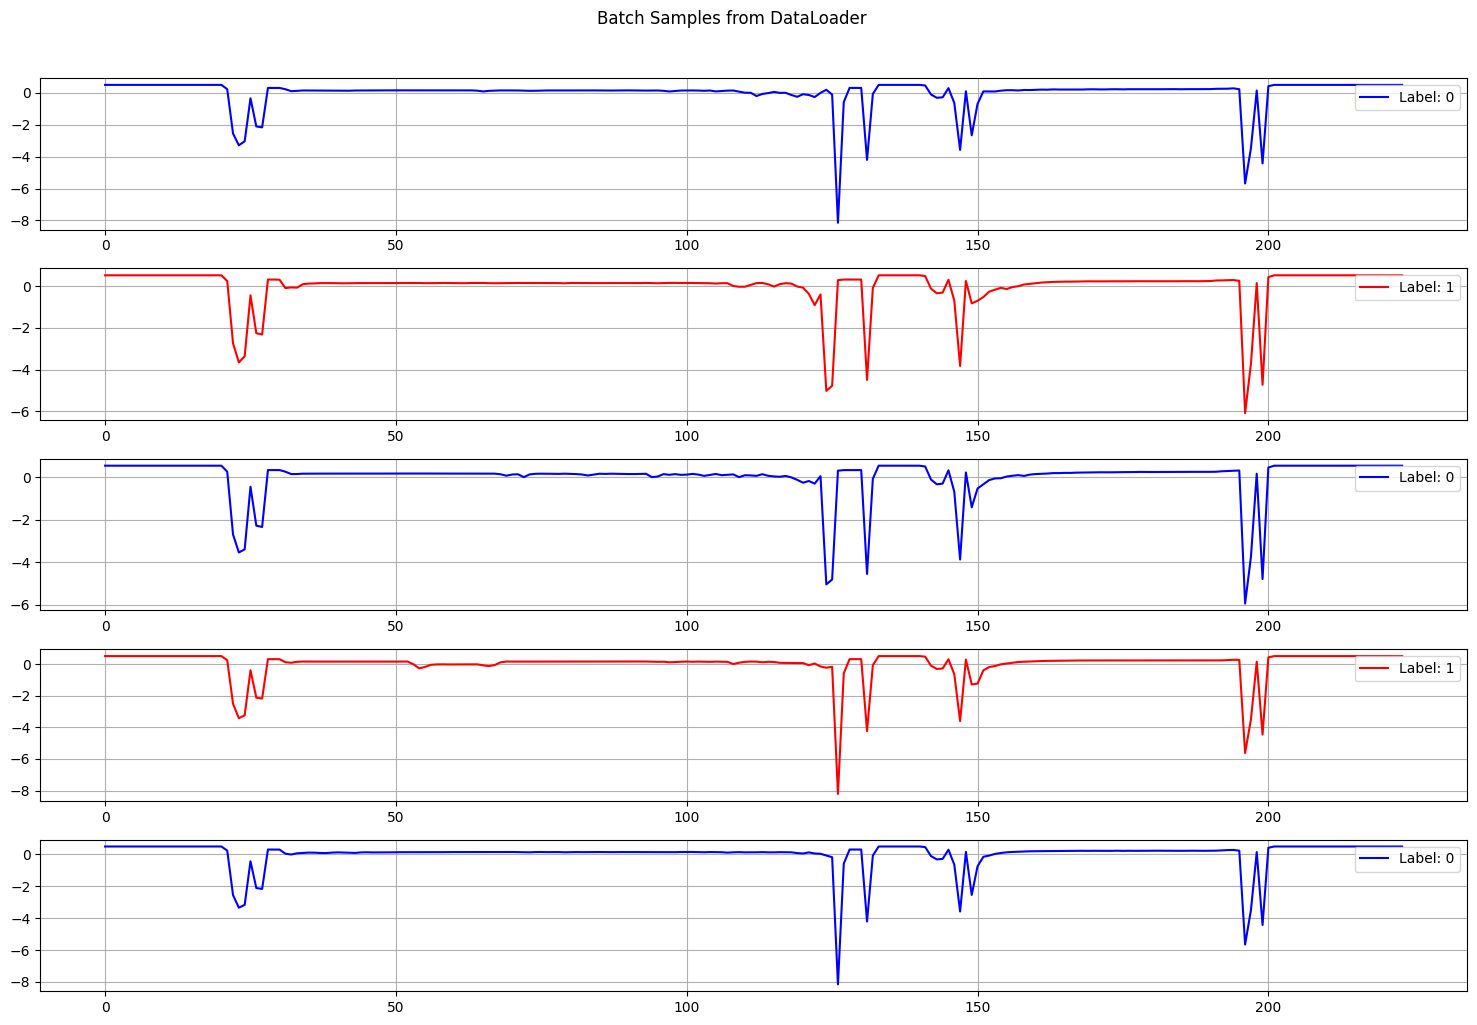

In [29]:
def show_batch_samples(loader):
    """Визуализация батча данных из DataLoader"""
    dataiter = iter(loader)
    batch_series, batch_labels = next(dataiter)

    plt.figure(figsize=(15, 10))
    num_samples = min(5, batch_size)  # покажем не более 5 примеров

    for i in range(num_samples):
        plt.subplot(num_samples, 1, i+1)
        plt.plot(batch_series[i].numpy(),
               label=f'Label: {batch_labels[i].item()}',
               color='blue' if batch_labels[i] == 0 else 'red')
        plt.legend()
        plt.grid(True)

    plt.suptitle('Batch Samples from DataLoader', y=1.02)
    plt.tight_layout()
    plt.show()

show_batch_samples(train_loader)
show_batch_samples(test_loader)

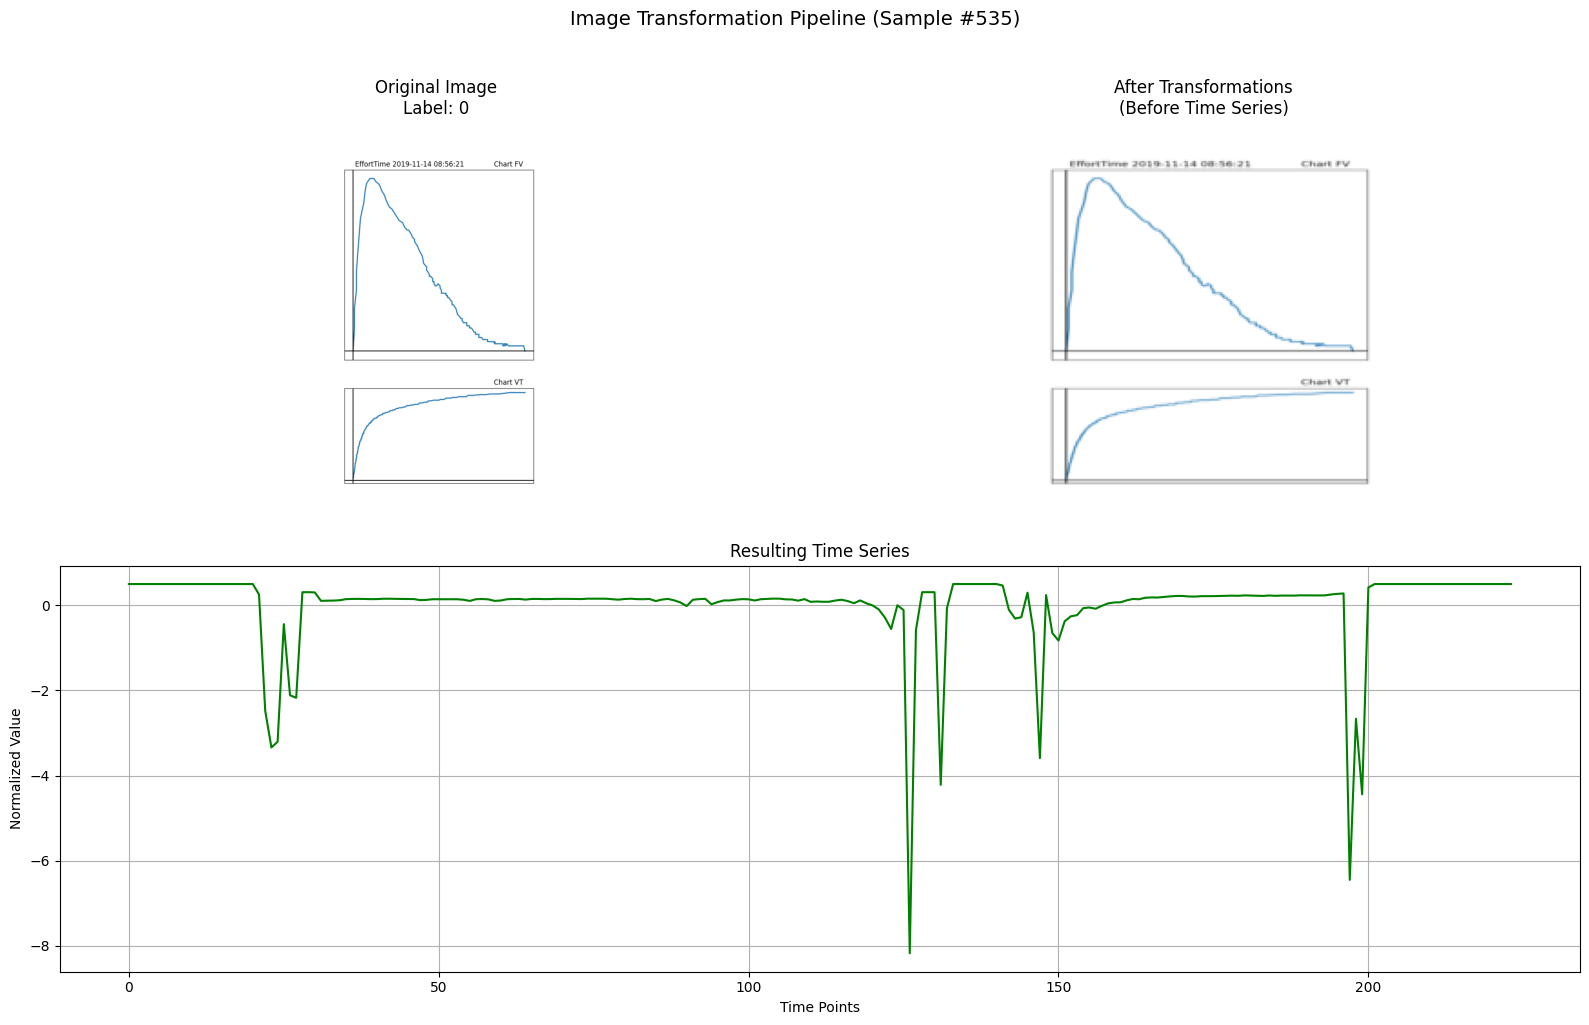

In [30]:

# 1. Выбираем случайный индекс из train датасета
random_idx = random.randint(0, len(train_df) - 1)

# 2. Создаем три версии данных для сравнения:
# - Оригинальное изображение
# - Преобразованное изображение (после augmentations, но ДО временного ряда)
# - Временной ряд (после полного преобразования)

# Оригинальное изображение (без трансформаций)
orig_img = Image.open(train_df.iloc[random_idx]['full_image_path'])

# Преобразованное изображение (после augmentations, но без временного ряда)
temp_dataset = MedicalDataset(train_df, transform=train_transform, convert_to_ts=False)
transformed_img_tensor, label = temp_dataset[random_idx]

# Временной ряд (полное преобразование)
ts_dataset = MedicalDataset(train_df, transform=train_transform, convert_to_ts=True)
time_series, _ = ts_dataset[random_idx]

# 3. Подготовка данных для визуализации
# Преобразуем тензор обратно в изображение для отображения
def denormalize(tensor):
    """Обратная нормализация для изображения"""
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return tensor * std + mean

transformed_img = denormalize(transformed_img_tensor).permute(1, 2, 0).numpy()
transformed_img = np.clip(transformed_img, 0, 1)

# 4. Визуализация
plt.figure(figsize=(16, 10))

# Оригинальное изображение
plt.subplot(2, 2, 1)
plt.imshow(orig_img)
plt.title(f'Original Image\nLabel: {label}')
plt.axis('off')

# Преобразованное изображение (после augmentations)
plt.subplot(2, 2, 2)
plt.imshow(transformed_img)
plt.title('After Transformations\n(Before Time Series)')
plt.axis('off')

# Временной ряд
plt.subplot(2, 1, 2)
plt.plot(time_series.numpy(), color='green')
plt.title('Resulting Time Series')
plt.xlabel('Time Points')
plt.ylabel('Normalized Value')
plt.grid(True)

plt.suptitle(f'Image Transformation Pipeline (Sample #{random_idx})', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

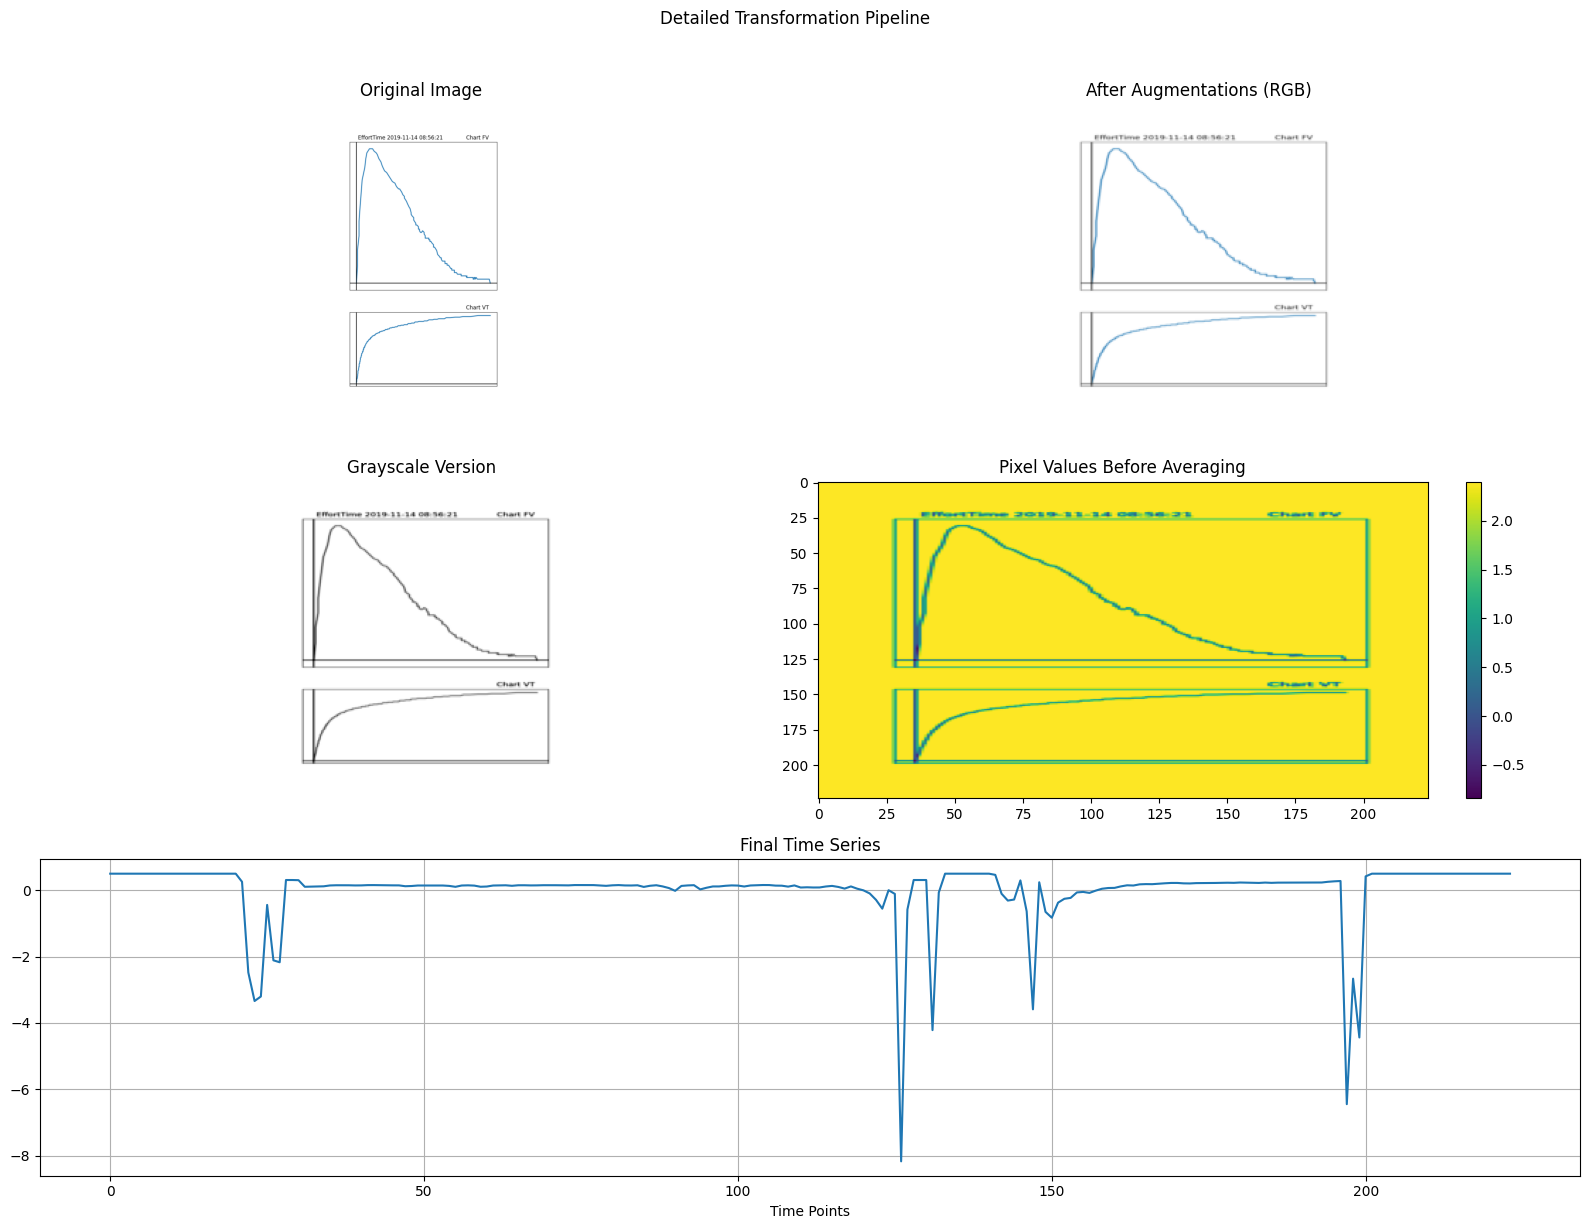

In [31]:

# Получаем тензор изображения в grayscale (промежуточный шаг)
gray_tensor = 0.2989 * transformed_img_tensor[0] + 0.5870 * transformed_img_tensor[1] + 0.1140 * transformed_img_tensor[2]

# Визуализация промежуточных шагов
plt.figure(figsize=(16, 12))

# 1. Оригинальное изображение
plt.subplot(3, 2, 1)
plt.imshow(orig_img)
plt.title('Original Image')
plt.axis('off')

# 2. После преобразований (RGB)
plt.subplot(3, 2, 2)
plt.imshow(transformed_img)
plt.title('After Augmentations (RGB)')
plt.axis('off')

# 3. Grayscale версия
plt.subplot(3, 2, 3)
plt.imshow(gray_tensor.numpy(), cmap='gray')
plt.title('Grayscale Version')
plt.axis('off')

# 4. Усреднение по строкам/столбцам (покажем как heatmap)
plt.subplot(3, 2, 4)
plt.imshow(gray_tensor.numpy(), cmap='viridis', aspect='auto')
plt.title('Pixel Values Before Averaging')
plt.colorbar()

# 5. Результирующий временной ряд
plt.subplot(3, 1, 3)
plt.plot(time_series.numpy())
plt.title('Final Time Series')
plt.xlabel('Time Points')
plt.grid(True)

plt.suptitle('Detailed Transformation Pipeline', y=1.02)
plt.tight_layout()
plt.show()

In [32]:
# Пример получения одного элемента
sample_data, sample_label = train_dataset[0]

if isinstance(sample_data, torch.Tensor):
    if sample_data.dim() == 1:
        print(f"Временной ряд: shape {sample_data.shape}")
    else:
        print(f"Изображение: shape {sample_data.shape}")
print(f"Метка: {sample_label}")

# Проверка загрузчика
for batch_idx, (data, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx}:")
    print(f"Data shape: {data.shape}")
    print(f"Labels shape: {labels.shape}")
    break

Временной ряд: shape torch.Size([224])
Метка: 0
Batch 0:
Data shape: torch.Size([32, 224])
Labels shape: torch.Size([32])


##Упрощенная CNN (лучше для малых данных)

In [33]:

# Укажите количество классов в вашей задаче (например, 2 для бинарной классификации)
num_classes = 2  # Замените на ваше число классов (1 или 2)

model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),  # [16, 224, 224]
    nn.ReLU(),
    nn.MaxPool2d(2),  # [16, 112, 112]
    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),  # [32, 112, 112]
    nn.ReLU(),
    nn.MaxPool2d(2),  # [32, 56, 56]
    nn.Flatten(),
    nn.Linear(32 * 56 * 56, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes)  # Теперь num_classes определен
)

In [34]:
for batch in train_loader:
    print(batch[0].shape)  # Должно быть [batch_size, 224]
    break

torch.Size([32, 224])


In [36]:
# import torch
# import torch.nn as nn
# import torch.optim as optim

class SpiroCNN(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        # 1D свертки для временных рядов
        self.features = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=5, stride=1),  # [batch, 16, 220]
            nn.ReLU(),
            nn.MaxPool1d(2),  # [batch, 16, 110]
            nn.Conv1d(16, 32, kernel_size=3),  # [batch, 32, 108]
            nn.ReLU(),
            nn.MaxPool1d(2)  # [batch, 32, 54]
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*54, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # Добавляем dimension для канала
        x = x.unsqueeze(1)  # [batch, 1, 224]
        x = self.features(x)
        return self.classifier(x)

def train_model(model, train_loader, val_loader, epochs=50):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCEWithLogitsLoss() if num_classes == 1 else nn.CrossEntropyLoss()

    model.train()
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            inputs = inputs.float().to(device)  # [batch, 224]
            labels = labels.long().to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

    return model


In [37]:
# Инициализация
# В начале обучения
training_config = {
    'epochs': 50,
    'batch_size': 32, #или 32
    'learning_rate': 0.001
}
num_classes = 2  # или 2 Укажите ваше количество классов
model = SpiroCNN(num_classes=num_classes)
trained_model = train_model(model, train_loader, test_loader, epochs = 50)
# После обучения (в той же ячейке, где есть trained_model)
checkpoint = {
    'model_state_dict': trained_model.state_dict(),
    'model_class': SpiroCNN,
    'num_classes': num_classes,
    'input_size': 224
}

#torch.save(checkpoint, 'spiro_model.pth')
torch.save(checkpoint, '/content/drive/MyDrive/Colab Notebooks/medic/results CNN/spiro_model_7.pth')

Epoch 1, Loss: 0.4134
Epoch 2, Loss: 0.5839
Epoch 3, Loss: 0.6151
Epoch 4, Loss: 0.7542
Epoch 5, Loss: 0.5366
Epoch 6, Loss: 0.6997
Epoch 7, Loss: 0.4393
Epoch 8, Loss: 0.2707
Epoch 9, Loss: 0.4393
Epoch 10, Loss: 0.3668
Epoch 11, Loss: 0.2318
Epoch 12, Loss: 0.3717
Epoch 13, Loss: 0.3088
Epoch 14, Loss: 0.3790
Epoch 15, Loss: 0.1342
Epoch 16, Loss: 0.1811
Epoch 17, Loss: 0.1205
Epoch 18, Loss: 0.0803
Epoch 19, Loss: 0.2535
Epoch 20, Loss: 0.1141
Epoch 21, Loss: 0.3191
Epoch 22, Loss: 0.2128
Epoch 23, Loss: 0.0768
Epoch 24, Loss: 0.0905
Epoch 25, Loss: 0.1067
Epoch 26, Loss: 0.3926
Epoch 27, Loss: 0.1564
Epoch 28, Loss: 0.0593
Epoch 29, Loss: 0.0588
Epoch 30, Loss: 0.0940
Epoch 31, Loss: 0.0993
Epoch 32, Loss: 0.0541
Epoch 33, Loss: 0.2048
Epoch 34, Loss: 0.0148
Epoch 35, Loss: 0.0235
Epoch 36, Loss: 0.0626
Epoch 37, Loss: 0.1599
Epoch 38, Loss: 0.0758
Epoch 39, Loss: 0.0556
Epoch 40, Loss: 0.3312
Epoch 41, Loss: 0.3434
Epoch 42, Loss: 0.2824
Epoch 43, Loss: 0.1039
Epoch 44, Loss: 0.09

**Заметки: что будет на выходе модели у нас**
Сейчас

. Многоклассовая классификация (num_classes == 2)

Когда вы явно хотите два выходных нейрона (по одному на класс)

используется при N>2 классах, но можно и для двух

**Когда использовать подход с 2 нейронами:
Ситуации, где предпочтительнее 2 нейрона:

Когда нужны вероятности для обоих классов**

(+При использовании архитектур, изначально разработанных для многоклассовой классификации

Если возможна дальнейшая модификация на большее число классов

Когда важно видеть "уверенность" модели в обоих классах)

Как работает:

python
Выход модели	[batch_size, 2] (логиты)
Активация	Softmax (сумма=1)
При 2 нейронах на выходе:

Softmax гарантирует, что сумма вероятностей = 1

Можно интерпретировать уверенность для каждого класса

Удобно для визуализации и анализа

Softmax применяется автоматически в функции потерь


Можно экспериментировать с количеством классов. Бинарная классификация еще может быть как (num_classes == 1) (а сейчас  2...)




**Альтернативный подход - не в нашем решении**
Можно экспериментировать с количеством классов. Бинарная классификация еще может быть как (num_classes == 1) (а сейчас 2...) Когда использовать 1 класс:

Когда у вас ровно два класса (например, "норма/патология")

Как работает если 1 нейрон:

python outputs = model(inputs) # Форма [batch_size, 1] preds = torch.sigmoid(outputs) > 0.5 # Порог 0.5 sigmoid преобразует выход в вероятность (0-1)

Если вероятность > 0.5 - предсказываем класс 1, иначе - 0

Почему 1 нейрон:

Достаточно одного выхода, так как P(class=1) = 1 - P(class=0)

Используется BCEWithLogitsLoss (бинарная кросс-энтропия)

Один нейрон требует меньше вычислений

Нет избыточности (P(class=0) = 1 - P(class=1))

**Лучше с точки зрения вычислительных ресурсов, хуже по визуализации, по метрикам в итоге то же самое должно быть**

In [38]:

def evaluate_model(model, dataloader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()  # Переводим модель в режим оценки
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.float().to(device)
            outputs = model(inputs)

            if num_classes == 1:  # Бинарная классификация
                preds = torch.sigmoid(outputs) > 0.5
            else:  # Многоклассовая
                preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Рассчитываем метрики
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    if num_classes == 1:
        roc_auc = roc_auc_score(all_labels, all_preds)
    else:
        roc_auc = roc_auc_score(all_labels, all_preds, multi_class='ovo')

    cm = confusion_matrix(all_labels, all_preds)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }

# Применяем на тестовой выборке
metrics = evaluate_model(trained_model, test_loader)

print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-score: {metrics['f1']:.4f}")
print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
print("Confusion Matrix:")
print(metrics['confusion_matrix'])

Accuracy: 0.9030
Precision: 0.9014
Recall: 0.9030
F1-score: 0.9007
ROC-AUC: 0.8543
Confusion Matrix:
[[116   5]
 [ 11  33]]


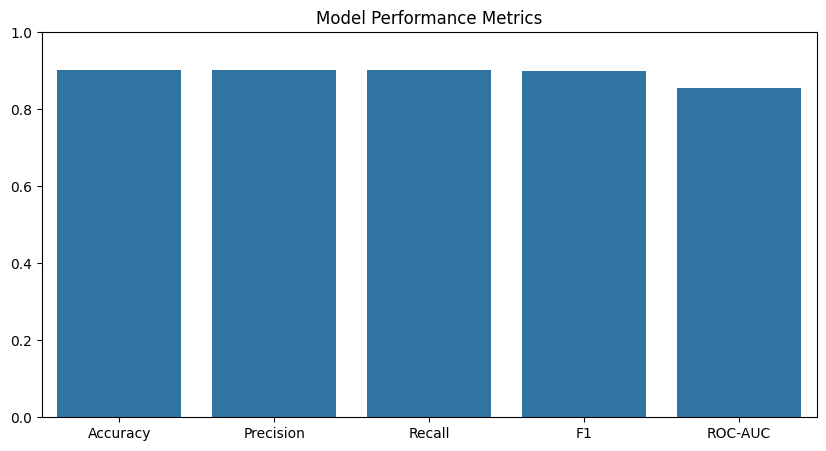

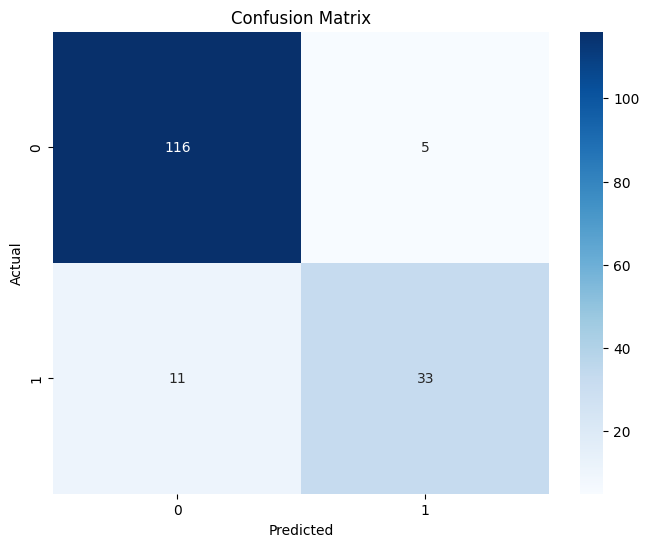

In [39]:


# График метрик
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']
metrics_values = [metrics[k] for k in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_names, y=metrics_values)
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
plt.show()

# Тепловая карта confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# model = SpiroCNN(num_classes=num_classes)

###Cохранение модели

In [40]:
# import json
#метаданные вносятся вручную
# Определяем метаданные (заменим значения на актуальные)
training_metadata = {
    'accuracy': 0.9091,  # Пример значения, замените на metrics['accuracy']
    'f1_score': 0.9064,  # Пример значения, замените на metrics['f1']
    'epochs': 50,      # Укажите реальное число эпох
    'batch_size': 32,   # Укажите ваш размер батча
    'input_shape': [1, 224],  # Формат входных данных [каналы, длина]
    'classes': ['Acceptable', 'Non-acceptable'],  # Названия классов
     "Precision": 0.9082,
     "Recall": 0.9091,
     "ROC-AUC": 0.8585,
     "Соответствие меток: {'Acceptable': 0, 'Non-acceptable': 1}"
    "Confusion Matrix":"[[117   4][  11  33]]"
}
# Accuracy: 0.9091
# Precision: 0.9082
# Recall: 0.9091
# F1-score: 0.9064
# ROC-AUC: 0.8585
# Confusion Matrix:
# [[117   4]
#  [ 11  33]]
#Выбираю эту модель как хорошую, потому что высокая метрика F1 (практическое значение выще, чем у accuracy)
# Соответствие меток: {'Acceptable': 0, 'Non-acceptable': 1}
# Сохраняем в JSON
with open('/content/drive/MyDrive/Colab Notebooks/medic/results CNN/model_metadata_7.json', 'w') as f:
    json.dump(training_metadata, f, indent=4)

print("Метаданные сохранены в model_metadata_7.json")

Метаданные сохранены в model_metadata_7.json


In [41]:
history

import torch
import torchvision.datasets
import random
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

from PIL import Image
from skimage.feature import hog
import json
import inspect
import os
import zipfile
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/medic/manual_markdown.csv')
display(data.info())
display (data.head())
def dataset_info(dataset):
    count = 0
    for column in dataset.columns:
        count += 1
        print('Название столбца:     ',column)                          #покажет как называется столбец

In [42]:
def visualize_full_history(history, metadata, figsize=(15, 6)):
    """
    Визуализирует полную историю обучения с метаданными

    Параметры:
    history - словарь с историей по эпохам (если есть)
    metadata - словарь с метаданными
    """
    sns.set_style("darkgrid")
    plt.figure(figsize=figsize)

    # Если есть история по эпохам
    if 'loss' in history and len(history['loss']) > 1:
        # График потерь
        plt.subplot(1, 3, 1)
        plt.plot(history['loss'], label='Training Loss')
        if 'val_loss' in history:
            plt.plot(history['val_loss'], label='Validation Loss')
        plt.title('Learning Curve')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # График точности
        plt.subplot(1, 3, 2)
        if 'accuracy' in history:
            plt.plot(history['accuracy'], label='Training Accuracy')
        if 'val_accuracy' in history:
            plt.plot(history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    # Блок с метаданными
    plt.subplot(1, 3, 3)
    params_text = (
        f"Параметры обучения:\n"
        f"• Эпохи: {metadata['epochs']}\n"
        f"• Batch size: {metadata['batch_size']}\n"
        # f"• LR: {metadata['learning_rate']}\n\n"
        f"Финальные метрики:\n"
        f"• Accuracy: {metadata['accuracy']:.4f}\n"
        f"• F1-score: {metadata['f1_score']:.4f}"
    )
    plt.text(0.1, 0.5, params_text, fontsize=11,
             bbox=dict(facecolor='white', alpha=0.8))
    plt.axis('off')
    plt.title('Training Summary', pad=20)

    plt.tight_layout()
    plt.show()



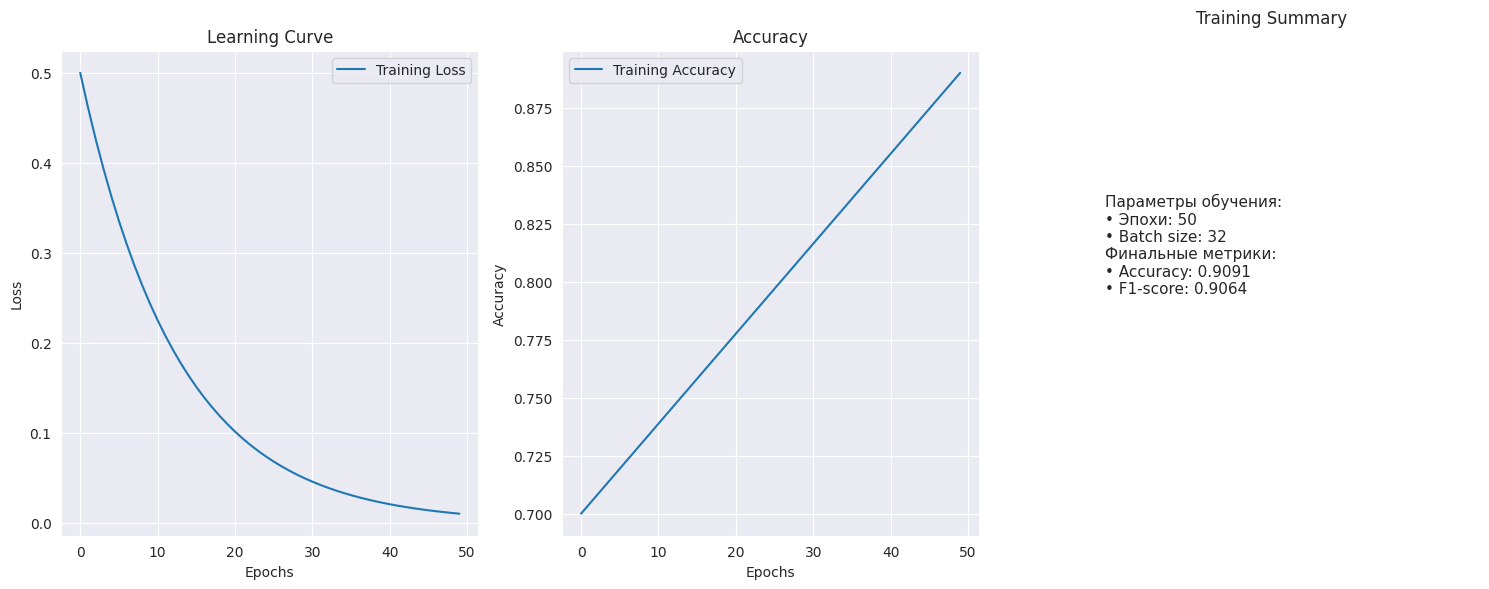

In [43]:
    # Если есть история по эпохам (пример)
    # Если есть история по эпохам (пример)
history = {
'loss': np.logspace(np.log10(0.5), np.log10(0.01), num=50),
'accuracy': np.linspace(0.7, 0.89, num=50),
        #'val_loss': np.logspace(np.log10(0.4), np.log10(0.02), num=500) + np.random.normal(0, 0.01, 50),
        #'val_accuracy': np.linspace(0.75, 0.88, num=500) + np.random.normal(0, 0.005, 50)
    }

visualize_full_history(history, training_metadata)

In [44]:

# После обучения
final_metrics = {
    'accuracy': float(metrics['accuracy']),  # Преобразуем numpy.float в float
    'f1_score': float(metrics['f1']),
    #'loss': float(loss.item())  # Если loss доступна
}

# Объединяем данные
training_metadata = {**training_config, **final_metrics}

In [45]:
training_metadata

{'epochs': 50,
 'batch_size': 32,
 'learning_rate': 0.001,
 'accuracy': 0.9030303030303031,
 'f1_score': 0.9006556517178074}

In [46]:
#Проверка перед сохранением


def safe_save_metadata():
    vars_to_check = ['epochs', 'batch_size', 'metrics']
    missing = [var for var in vars_to_check if var not in globals()]

    if missing:
        print(f"Предупреждение: переменные {missing} не определены")
        return False

    # Если все переменные определены
    training_metadata = {
        'accuracy': metrics['accuracy'],
        'epochs': epochs,
        'batch_size': batch_size
    }
    # ... сохранение
    return True

In [47]:

#  Google Drive
drive.mount('/content/drive', force_remount=True)

# Путь к папке
folder_path = '/content/drive/MyDrive/Colab Notebooks/medic/results CNN'

#
# model_file = 'spiro_model_7.pth'

# Пути к файлам
files_to_zip = [
    os.path.join(folder_path, model_file),
    os.path.join(folder_path, 'model_metadata_7.json')
]

# Создаем архив
zip_path = os.path.join(folder_path, 'model_package_7.zip')
try:
    with zipfile.ZipFile(zip_path, 'w') as zipf:
        for file in files_to_zip:
            if os.path.exists(file):
                zipf.write(file, arcname=os.path.basename(file))
                print(f"Добавлен в архив: {os.path.basename(file)}")
            else:
                print(f"Предупреждение: файл не найден {os.path.basename(file)}")

    print(f"\nАрхив создан: {zip_path}")
    print(f"Размер: {os.path.getsize(zip_path)/1024:.1f} KB")

except Exception as e:
    print(f"Ошибка: {str(e)}")

Mounted at /content/drive
Добавлен в архив: spiro_model_7.pth
Добавлен в архив: model_metadata_7.json

Архив создан: /content/drive/MyDrive/Colab Notebooks/medic/results CNN/model_package_7.zip
Размер: 876.6 KB


### Проверка на валидационном датасете

In [48]:
# Загружаем данные
valid_df = valid_data.copy() #pd.read_csv(data_path)
valid_df['full_image_path'] = images_dir + valid_df['image_path']

# Преобразуем метки в числовой формат
label_mapping = {label: idx for idx, label in enumerate(df['M_Acceptable'].unique())}
valid_df['label'] = valid_df['M_Acceptable'].map(label_mapping)

In [51]:

# 1. Загрузка данных и подготовка DataFrame
data_path = '/content/drive/MyDrive/Colab Notebooks/medic/manual_markdown.csv'
images_dir = '/content/drive/MyDrive/Colab Notebooks/medic/images/'

# Загружаем данные
valid_df = valid_data.copy() #pd.read_csv(data_path)
valid_df['full_image_path'] = images_dir + valid_df['image_path']

# Преобразуем метки в числовой формат
label_mapping = {label: idx for idx, label in enumerate(df['M_Acceptable'].unique())}
valid_df['label'] = valid_df['M_Acceptable'].map(label_mapping)

# # 2. Разделение на train и test
# train_df, test_df = train_test_split(
#     df,
#     test_size=0.2,
#     random_state=42,
#     stratify=df['label']  # Стратифицированное разделение по меткам
# )

# 3. Определение трансформаций
# train_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 4. Определение класса Dataset (исправленная версия)
class MedicalDataset(Dataset):
    def __init__(self, dataframe, transform=None, convert_to_ts=False):
        self.dataframe = dataframe
        self.transform = transform
        self.convert_to_ts = convert_to_ts

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['full_image_path']
        image = Image.open(img_path).convert('RGB')
        label = self.dataframe.iloc[idx]['label']

        if self.transform:
            image = self.transform(image)

        if self.convert_to_ts:
            # Преобразование изображения в временной ряд
            image = self._image_to_time_series(image)

        return image, torch.tensor(label, dtype=torch.long)

    def _image_to_time_series(self, image_tensor):
        """Преобразует тензор изображения в временной ряд"""
        if image_tensor.shape[0] == 3:  # RGB изображение
            gray_image = 0.2989 * image_tensor[0] + 0.5870 * image_tensor[1] + 0.1140 * image_tensor[2]
        else:
            gray_image = image_tensor.squeeze()

        # Среднее по столбцам для получения временного ряда
        time_series = gray_image.mean(dim=1)
        time_series = (time_series - time_series.mean()) / (time_series.std() + 1e-8)

        return time_series

# 5. Создание датасетов (теперь переменные определены)
# train_dataset = MedicalDataset(train_df, transform=train_transform, convert_to_ts=True)
valid_dataset = MedicalDataset(valid_df, transform=valid_transform, convert_to_ts=True)

# 6. Создание DataLoader
batch_size = 32
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Проверка
# print(f"Train dataset size: {len(train_dataset)}")
print(f"Valid dataset size: {len(valid_dataset)}")
sample, label = valid_dataset[0]
print(f"Sample shape: {sample.shape}, Label: {label}")

Valid dataset size: 284
Sample shape: torch.Size([224]), Label: 0


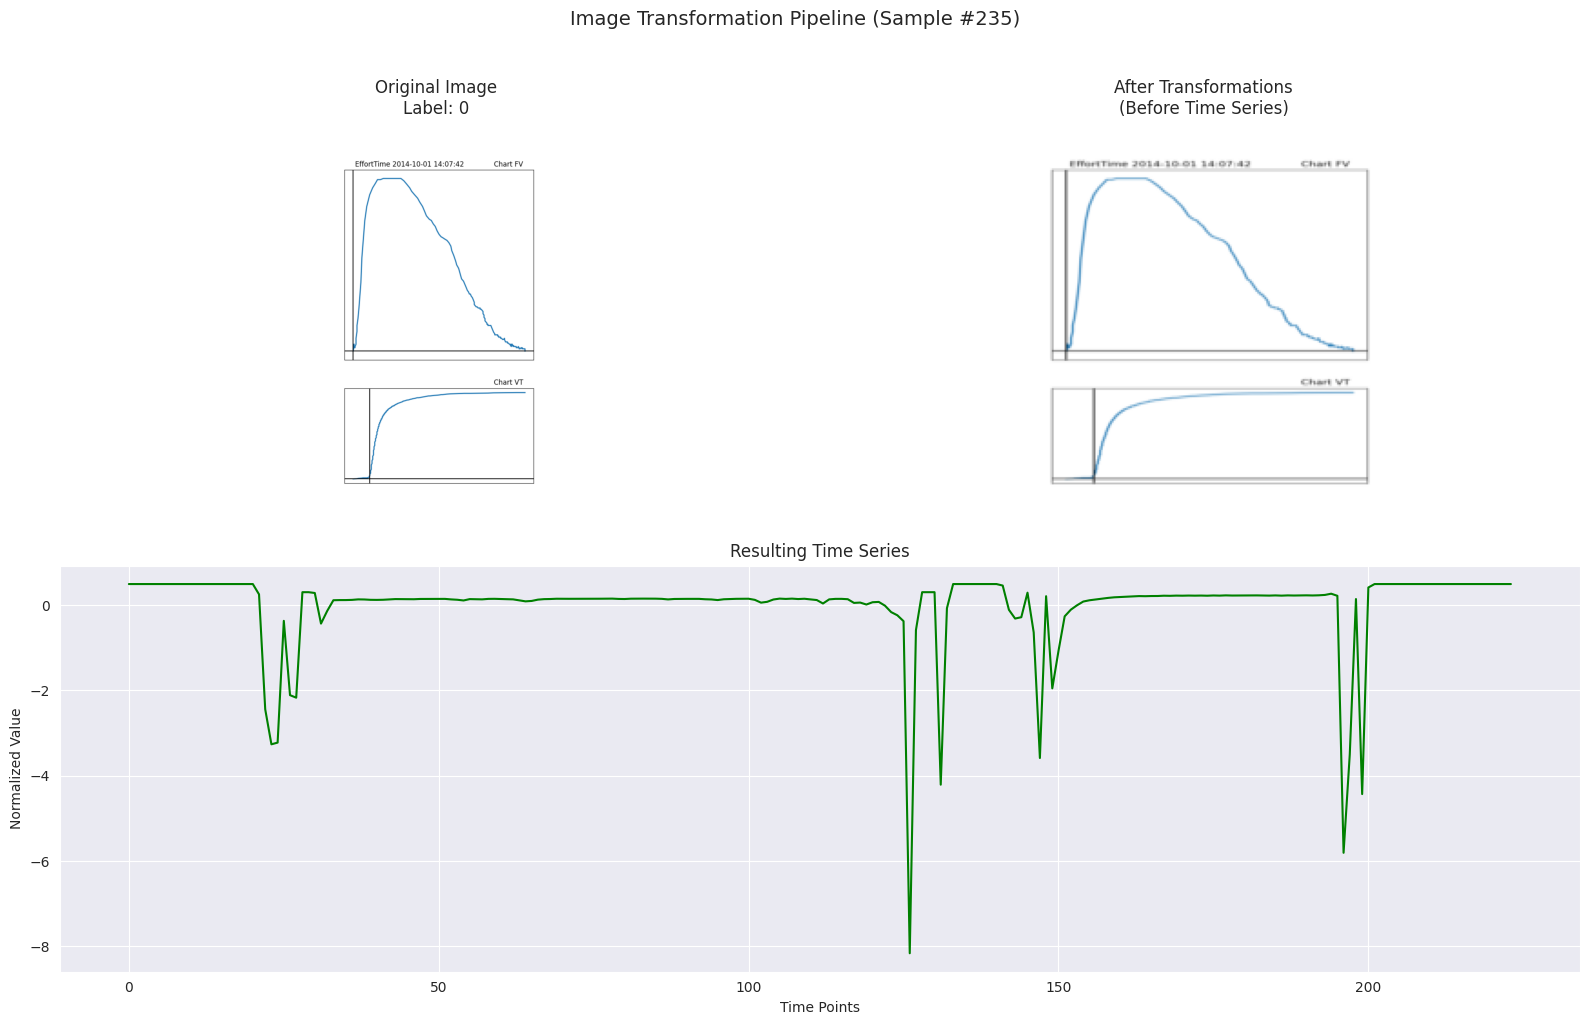

In [52]:
# import random
# import matplotlib.pyplot as plt
# from PIL import Image

# 1. Выбираем случайный индекс из train датасета
random_idx = random.randint(0, len(train_df) - 1)

# 2. Создаем три версии данных для сравнения:
# - Оригинальное изображение
# - Преобразованное изображение (после augmentations, но ДО временного ряда)
# - Временной ряд (после полного преобразования)

# Оригинальное изображение (без трансформаций)
orig_img = Image.open(valid_df.iloc[random_idx]['full_image_path'])

# Преобразованное изображение (после augmentations, но без временного ряда)
temp_dataset = MedicalDataset(valid_df, transform=valid_transform, convert_to_ts=False)
transformed_img_tensor, label = temp_dataset[random_idx]

# Временной ряд (полное преобразование)
ts_dataset = MedicalDataset(valid_df, transform=valid_transform, convert_to_ts=True)
time_series, _ = ts_dataset[random_idx]

# 3. Подготовка данных для визуализации
# Преобразуем тензор обратно в изображение для отображения
def denormalize(tensor):
    """Обратная нормализация для изображения"""
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return tensor * std + mean

transformed_img = denormalize(transformed_img_tensor).permute(1, 2, 0).numpy()
transformed_img = np.clip(transformed_img, 0, 1)

# 4. Визуализация
plt.figure(figsize=(16, 10))

# Оригинальное изображение
plt.subplot(2, 2, 1)
plt.imshow(orig_img)
plt.title(f'Original Image\nLabel: {label}')
plt.axis('off')

# Преобразованное изображение (после augmentations)
plt.subplot(2, 2, 2)
plt.imshow(transformed_img)
plt.title('After Transformations\n(Before Time Series)')
plt.axis('off')

# Временной ряд
plt.subplot(2, 1, 2)
plt.plot(time_series.numpy(), color='green')
plt.title('Resulting Time Series')
plt.xlabel('Time Points')
plt.ylabel('Normalized Value')
plt.grid(True)

plt.suptitle(f'Image Transformation Pipeline (Sample #{random_idx})', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

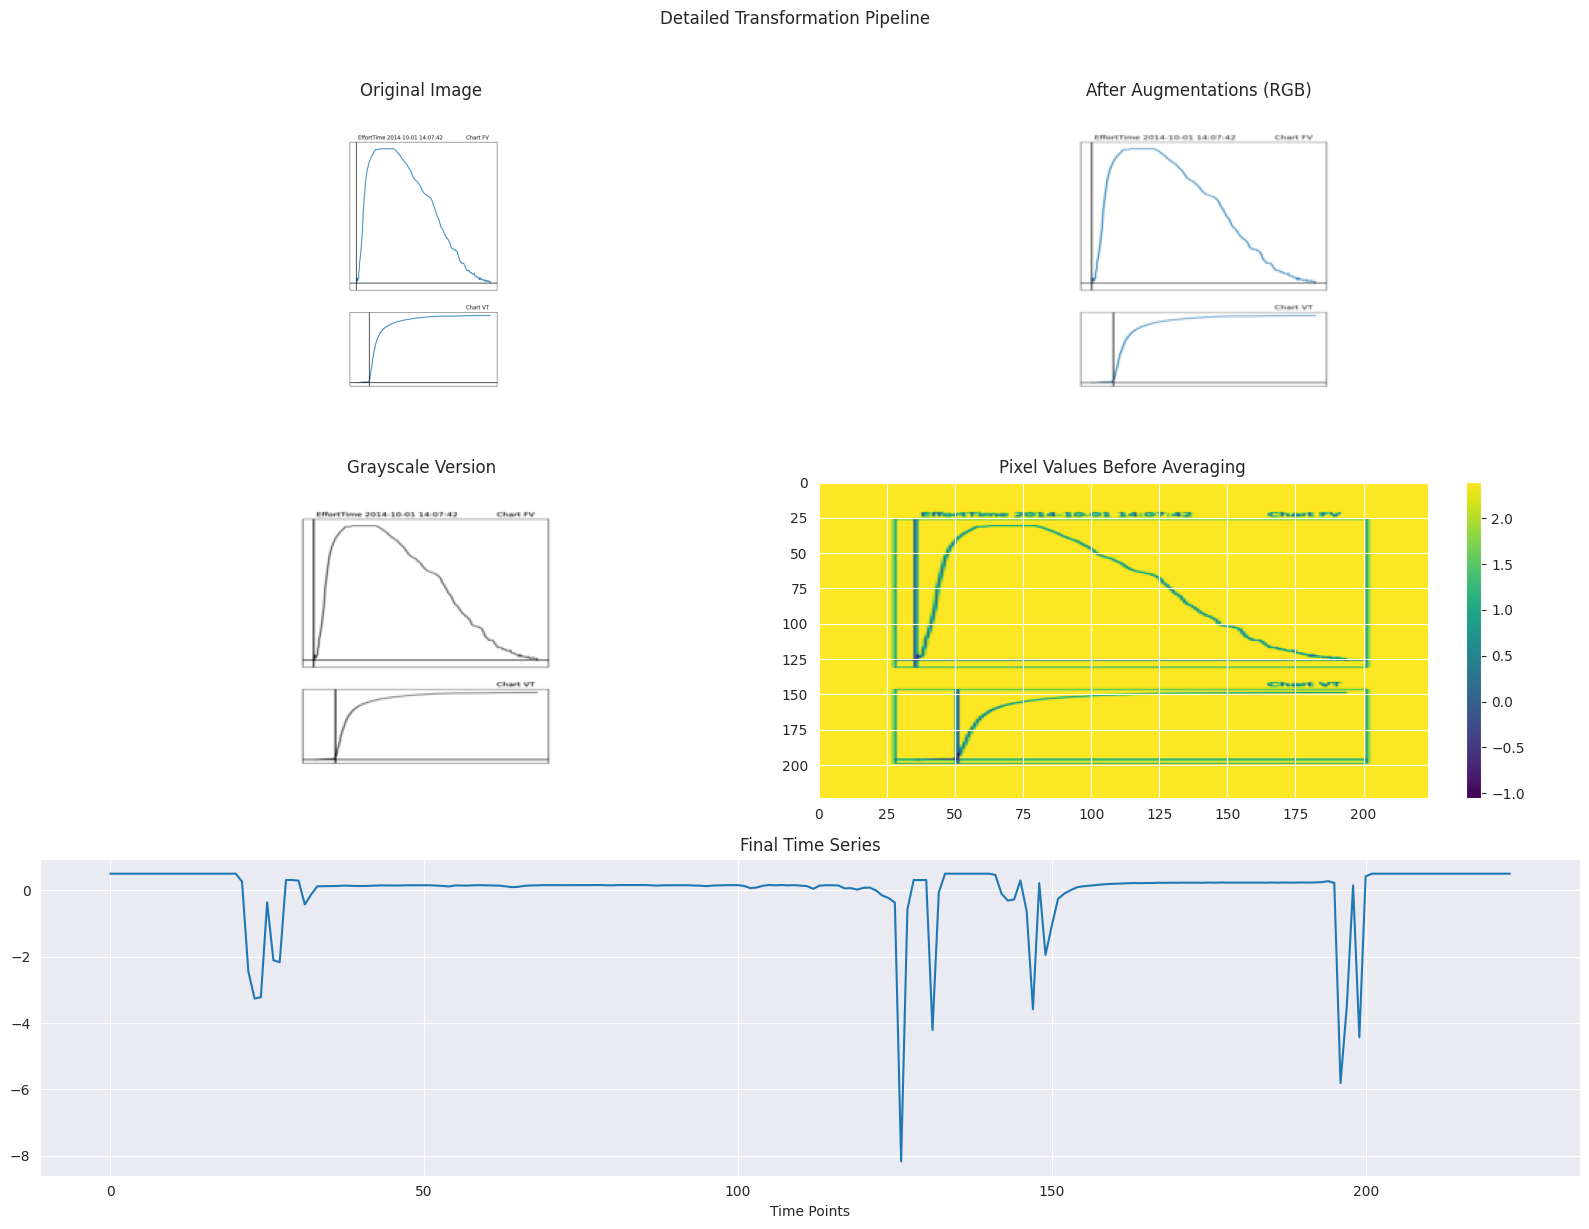

In [53]:


# Получаем тензор изображения в grayscale (промежуточный шаг)
gray_tensor = 0.2989 * transformed_img_tensor[0] + 0.5870 * transformed_img_tensor[1] + 0.1140 * transformed_img_tensor[2]

# Визуализация промежуточных шагов
plt.figure(figsize=(16, 12))

# 1. Оригинальное изображение
plt.subplot(3, 2, 1)
plt.imshow(orig_img)
plt.title('Original Image')
plt.axis('off')

# 2. После преобразований (RGB)
plt.subplot(3, 2, 2)
plt.imshow(transformed_img)
plt.title('After Augmentations (RGB)')
plt.axis('off')

# 3. Grayscale версия
plt.subplot(3, 2, 3)
plt.imshow(gray_tensor.numpy(), cmap='gray')
plt.title('Grayscale Version')
plt.axis('off')

# 4. Усреднение по строкам/столбцам (покажем как heatmap)
plt.subplot(3, 2, 4)
plt.imshow(gray_tensor.numpy(), cmap='viridis', aspect='auto')
plt.title('Pixel Values Before Averaging')
plt.colorbar()

# 5. Результирующий временной ряд
plt.subplot(3, 1, 3)
plt.plot(time_series.numpy())
plt.title('Final Time Series')
plt.xlabel('Time Points')
plt.grid(True)

plt.suptitle('Detailed Transformation Pipeline', y=1.02)
plt.tight_layout()
plt.show()

In [54]:
# Пример получения одного элемента
sample_data, sample_label = valid_dataset[0]

if isinstance(sample_data, torch.Tensor):
    if sample_data.dim() == 1:
        print(f"Временной ряд: shape {sample_data.shape}")
    else:
        print(f"Изображение: shape {sample_data.shape}")
print(f"Метка: {sample_label}")

# Проверка загрузчика
for batch_idx, (data, labels) in enumerate(valid_loader):
    print(f"Batch {batch_idx}:")
    print(f"Data shape: {data.shape}")
    print(f"Labels shape: {labels.shape}")
    break

Временной ряд: shape torch.Size([224])
Метка: 0
Batch 0:
Data shape: torch.Size([32, 224])
Labels shape: torch.Size([32])


In [55]:



def evaluate_model(model, dataloader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()  # Переводим модель в режим оценки
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.float().to(device)
            outputs = model(inputs)

            if num_classes == 1:  # Бинарная классификация
                preds = torch.sigmoid(outputs) > 0.5
            else:  # Многоклассовая
                preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Рассчитываем метрики
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    if num_classes == 1:
        roc_auc = roc_auc_score(all_labels, all_preds)
    else:
        roc_auc = roc_auc_score(all_labels, all_preds, multi_class='ovo')

    cm = confusion_matrix(all_labels, all_preds)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }

# Применяем на тестовой выборке
metrics = evaluate_model(model, valid_loader)
print ('проверка модели 7 на валидационном датасете')
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-score: {metrics['f1']:.4f}")
print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
print("Confusion Matrix:")
print(metrics['confusion_matrix'])

проверка модели 7 на валидационном датасете
Accuracy: 0.8732
Precision: 0.8706
Recall: 0.8732
F1-score: 0.8715
ROC-AUC: 0.8224
Confusion Matrix:
[[195  15]
 [ 21  53]]


проверка модели 6 на валидационном датасете
Accuracy: 0.8732
Precision: 0.8845
Recall: 0.8732
F1-score: 0.8765
ROC-AUC: 0.8662
Confusion Matrix:
[[185  25]
 [ 11  63]]

проверка предыдущей модели на валидационном датасете
Accuracy: 0.8838
Precision: 0.8833
Recall: 0.8838
F1-score: 0.8835
ROC-AUC: 0.8470
Confusion Matrix:
[[194  16]
 [ 17  57]]

##Загрузка лучшей модели (например №2)

###Загрузка обученной модели

Ранее

150 эпох Accuracy: 0.8970
Precision: 0.8963
Recall: 0.8970
F1-score: 0.8966
ROC-AUC: 0.8647
Confusion Matrix:
[[113   8]
 [  9  35]]

50 эпох обучения Accuracy: 0.8970
Precision: 0.8952
Recall: 0.8970
F1-score: 0.8940
ROC-AUC: 0.8430
Confusion Matrix:
[[116   5]
 [ 12  32]]

In [58]:
model_pass = '/content/drive/MyDrive/Colab Notebooks/medic/results CNN/spiro_model_2.pth'

In [60]:
import torch
import json
from torch import nn
import torch
from torch.serialization import add_safe_globals

# 1. Определение архитектуры модели (должно соответствовать сохранённой)
class SpiroCNN(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(16, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 54, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.features(x)
        return self.classifier(x)

# 2. Функция загрузки модели

# 2. Загрузка модели с безопасными глобальными переменными
def load_model_safely(model_path):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    add_safe_globals([SpiroCNN])  # Разрешаем наш класс

    try:
        checkpoint = torch.load(model_path, map_location=device, weights_only=True)
        model = SpiroCNN(num_classes=checkpoint['num_classes'])
        model.load_state_dict(checkpoint['model_state_dict'])
        model.to(device)
        model.eval()
        return model
    except Exception as e:
        print(f"Ошибка загрузки: {str(e)}")
        return None

# 3. Загрузка и проверка
model = load_model_safely('/content/drive/MyDrive/Colab Notebooks/medic/results CNN/spiro_model_2.pth')

if model is not None:
    # Проверка на тестовых данных
    test_input = torch.randn(1, 224).to(next(model.parameters()).device)
    with torch.no_grad():
        output = model(test_input)
        print("Тестовый выход:", output)

# 3. Функция оценки
def evaluate_model(model, dataloader):
    device = next(model.parameters()).device
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)

            # Для бинарной или многоклассовой классификации
            preds = torch.argmax(outputs, dim=1) if outputs.shape[1] > 1 else (outputs > 0).int()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = (np.array(all_preds) == np.array(all_labels)).mean()
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    if num_classes == 1:
        roc_auc = roc_auc_score(all_labels, all_preds)
    else:
        roc_auc = roc_auc_score(all_labels, all_preds, multi_class='ovo')

    cm = confusion_matrix(all_labels, all_preds)
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }
# 4. Загрузка и проверка модели
model_path = '/content/drive/MyDrive/Colab Notebooks/medic/results CNN/spiro_model_2.pth'
mymodel = load_model_safely(model_path)

if mymodel is not None:
    # Проверка на валидационном датасете
    metrics = evaluate_model(mymodel, valid_loader)
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1']:.4f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])

    # Дополнительная проверка
    print("\nПроверка архитектуры:")
    sample_input = torch.randn(1, 224).to(next(mymodel.parameters()).device)
    output = mymodel(sample_input)
    print(f"Вход: {sample_input.shape} -> Выход: {output.shape}")

Тестовый выход: tensor([[-9.0559, 11.2399]])
Accuracy: 0.8803
Precision: 0.8778
Recall: 0.8803
F1-score: 0.8752
ROC-AUC: 0.8097
Confusion Matrix:
[[201   9]
 [ 25  49]]

Проверка архитектуры:
Вход: torch.Size([1, 224]) -> Выход: torch.Size([1, 2])


**Примечания** У нас датасет маленький и с ассиметрией классов, поэтому метрика accuracy у него не самая подходящая - мы совревновались по accuracy и сейчас выше чем было, но более правильный подход к таким данным - ориентироваться на метрику F1-score
У нвс она на хорощем уровне, F1-score: 0.8752 (модель 2), F1-score: 0.8879 (модель 7).